In [1]:

#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
bank_df = pd.read_csv(r"C:\Users\Preeti\Desktop\Data Glacier Internship\Bank_Campaign_Marketing\Dataset\bank-additional-full.csv",sep=";")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#change columns name
bank_df.rename(columns = {'emp.var.rate' : 'EVR', 'cons.price.idx' : 'CPI', 
                       'cons.conf.idx' : 'CCI', 'euribor3m' : 'euribor',
                       'nr.employed' : 'no_emp'}, inplace = True)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41188 non-null  int64  
 1   job          41188 non-null  object 
 2   marital      41188 non-null  object 
 3   education    41188 non-null  object 
 4   default      41188 non-null  object 
 5   housing      41188 non-null  object 
 6   loan         41188 non-null  object 
 7   contact      41188 non-null  object 
 8   month        41188 non-null  object 
 9   day_of_week  41188 non-null  object 
 10  duration     41188 non-null  int64  
 11  campaign     41188 non-null  int64  
 12  pdays        41188 non-null  int64  
 13  previous     41188 non-null  int64  
 14  poutcome     41188 non-null  object 
 15  EVR          41188 non-null  float64
 16  CPI          41188 non-null  float64
 17  CCI          41188 non-null  float64
 18  euribor      41188 non-null  float64
 19  no_e

In [5]:
bank_df.duplicated().any()

True

In [6]:
bank_df[bank_df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,EVR,CPI,CCI,euribor,no_emp,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Some of the duplicate rows are consecutive and the rest are largely nearby in the dataset. Therefore, this doesn't seem like the case of some customers randomly having similar details. It looks like the data duplication happened while entering the data.

Let's remove these duplicate rows.

In [7]:
bank_df.drop_duplicates(inplace =True)
bank_df.shape

(41176, 21)

In [8]:
df = bank_df.copy()
for col in df.columns:
    df = df.loc[~(bank_df[col] == 'unknown')]

df.shape

(30478, 21)

Our target variable 'y' is categorical variable with the values of 'yes' and 'no'. It could be useful if we can add one more column where we record the same result in binary 0 and 1.

In [9]:
# new column name is y_n where n denotes numeric
bank_df.loc[bank_df['y'] == 'yes','y_n'] = 1
bank_df.loc[bank_df['y'] == 'no', 'y_n'] = 0

In [10]:
bank_df.describe()

,age,duration,campaign,pdays,previous,EVR,CPI,CCI,euribor,no_emp,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## What is the structure of your dataset?
There are 21 columns and 41176 rows in the dataset. Some of the variables in the dataset has values as 'unknown'. As removing these values could reduce our dataset size and impact our analysis, we will choose to keep the values as is.

## What is/are the main feature(s) of interest in your dataset?
The main feature of interest in the dataset is column 'y' since this records the result whether the client agreed to opening the term deposit.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
We would want to analyze factors such as age, job, education, marital status, call duration, number of contacts made in the campaign, the results of previous campaign outcome. We will also see explore the impact of financial variables such as employment variation rate, consumer price index, consumer confidence index and euribor 3 month rate.

### Checking bank clients agree to open term deposit

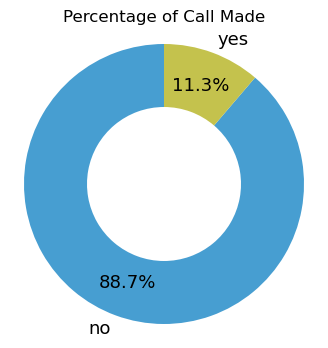

In [11]:
ratio = bank_df.y.value_counts()

plt.figure(figsize = (4,4))
plt.pie(ratio, labels = ratio.index, autopct='%1.1f%%', pctdistance=0.75, colors = ['#479ed1', '#c4c24d'],
        startangle = 90, wedgeprops = {'width' : 0.45}, textprops={'fontsize': 13})
plt.title('Percentage of Call Made')
plt.axis('square');

Out of the total calls that are made, 
11.3% of them are successful

Text(0.5, 1.0, 'Age Vs Subscription')

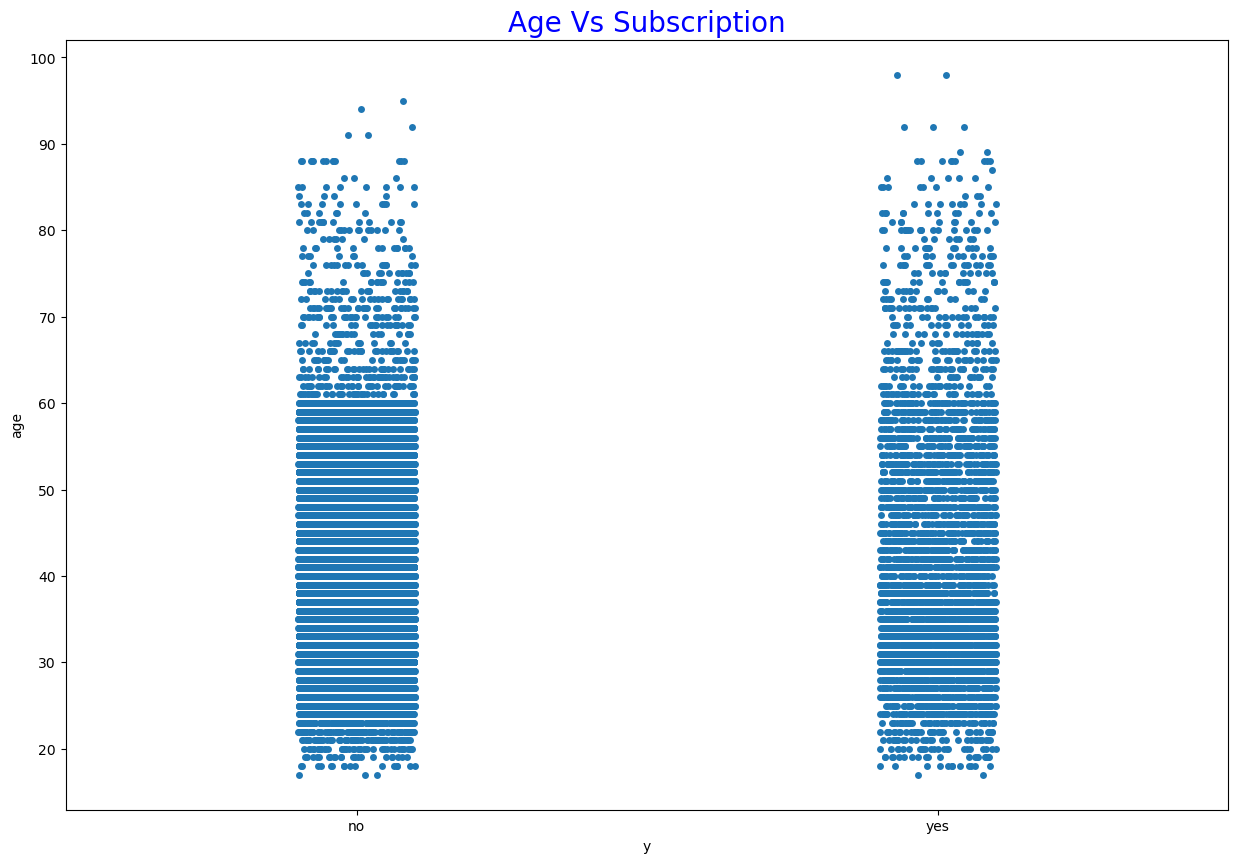

In [12]:
figure = plt.figure(figsize=(15,10))
plt.rcParams.update({'text.color':"blue"})
sns.stripplot(x = 'y', y= 'age', data= bank_df)
plt.title("Age Vs Subscription", fontsize=20)

In [13]:
bank_df.query('20< age<=60').shape[0]/bank_df.shape[0]

0.9745239945599379

##### 97.5% of the clients fall in the age range of 20-55 years 

## Distribution as per Education

Text(0.5, 1.0, 'Distribution of Education with Y')

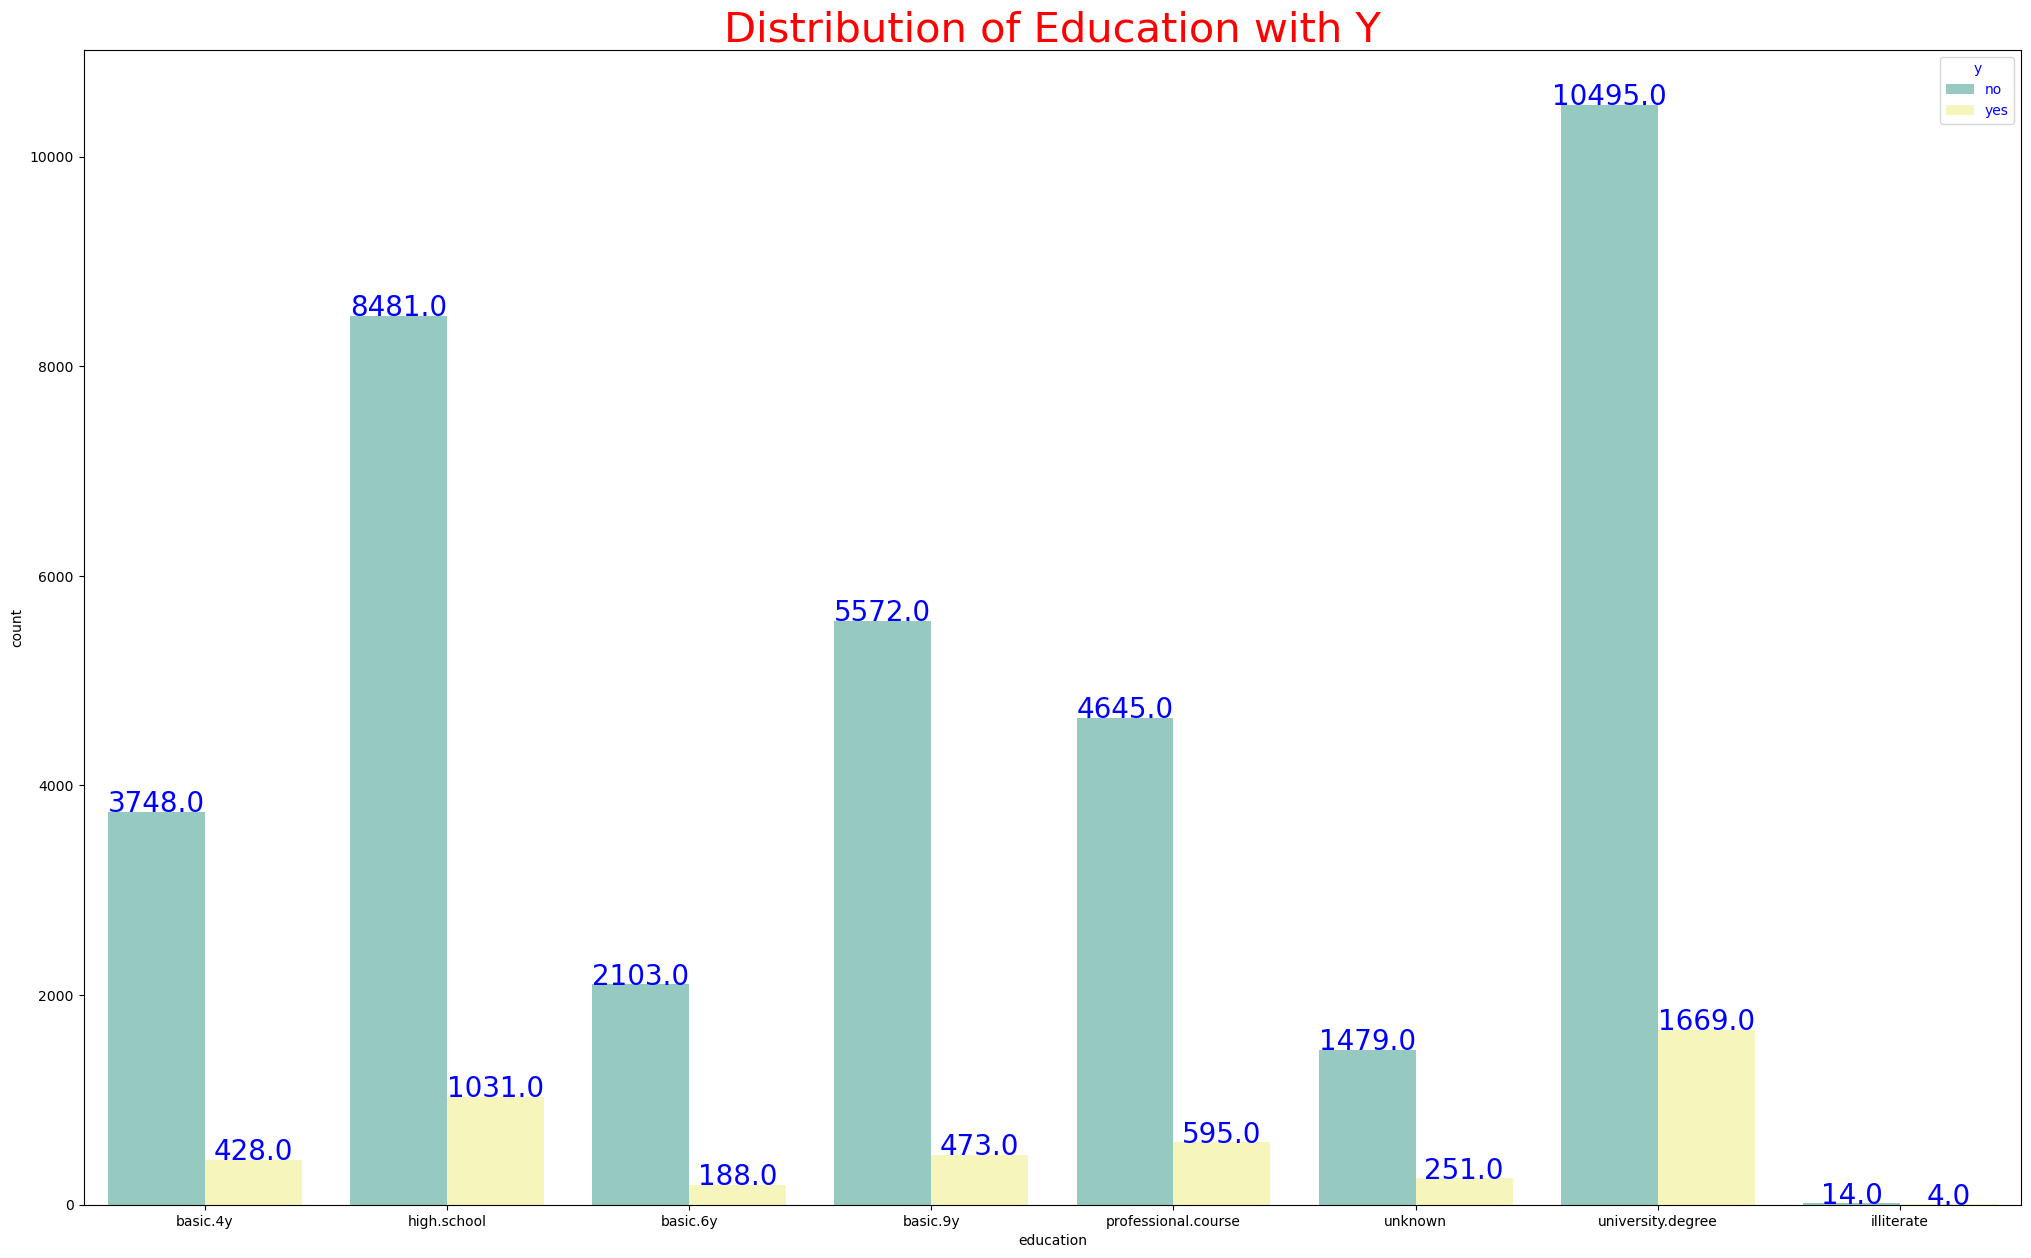

In [14]:
# Let us see which level of education has a higher rate of positive outcome in the target variable
fig = plt.figure(figsize=(25,15))
block = sns.countplot(x = 'education', hue='y', data= bank_df, palette= ("Set3"))
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'blue',size=20)
block.set_title("Distribution of Education with Y", fontsize = 30, color= 'red')

In [15]:
bank_df.education.value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

We see that the highest number of interested customers comes from University Degree holders. Surprisingly, we see that the next highest number comes from customers with just a high school degree. Let us go ahead and check the distribution for JOB

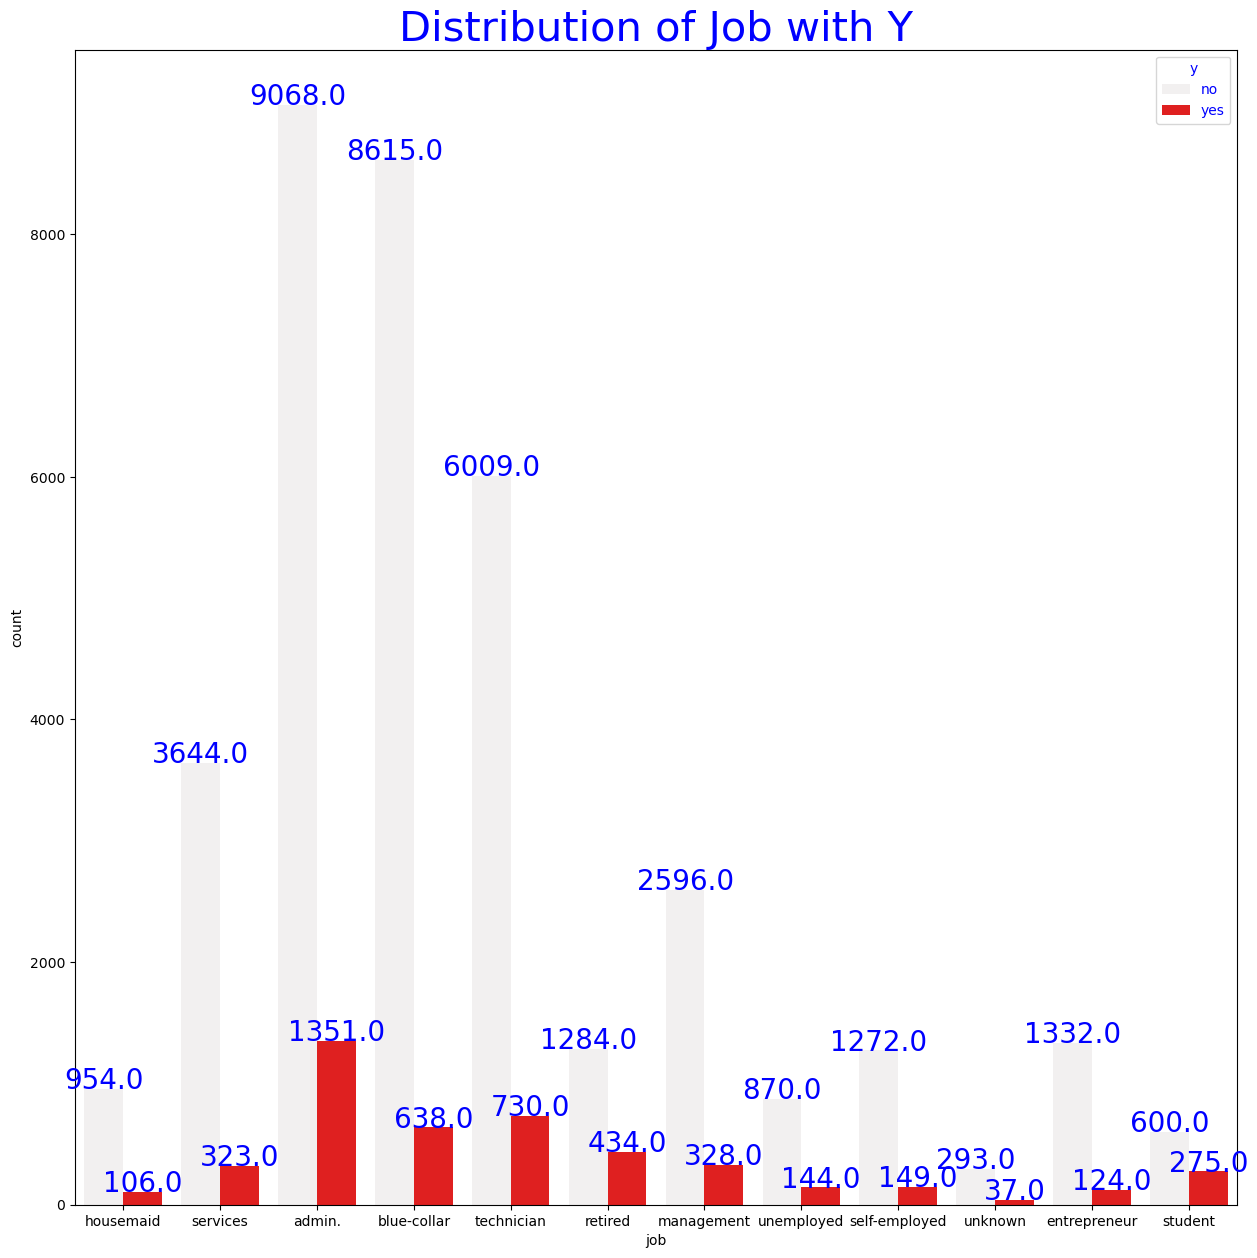

In [16]:
# Let's see distribution of clients as per job

plt.figure(figsize = (15,15))
block= sns.countplot(data = bank_df, x = 'job',hue='y', color = 'red',dodge=True);
block.set_xticklabels(block.get_xticklabels(),rotation=0)
for i in block.patches:
    height = i.get_height()
    block.text(i.get_x()+i.get_width()/2., height +0.1, height, ha= 'center', color= 'blue',size=20)
plt.title('Distribution of Job with Y',fontsize=30,color='blue')
plt.show()

We see that the highest number of interestes customers comes from those working in admin. The next highest categories are blue-collar and technician.

## Distribution of call Duration 

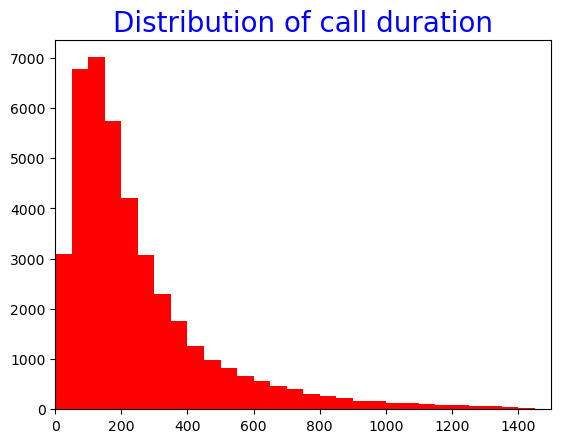

In [17]:
# distribution of duration
d_bins = np.arange(0,1500,50)
plt.hist(data= bank_df, x= 'duration', bins= d_bins, color= 'red')
plt.title('Distribution of call duration', fontsize=20, color='blue')
plt.xlim(0,1500);

Distribution is heavily concentrated until 400 seconds. Let's change it into log scale to analyze better

Text(0.5, 1.0, 'Call duration with log scale')

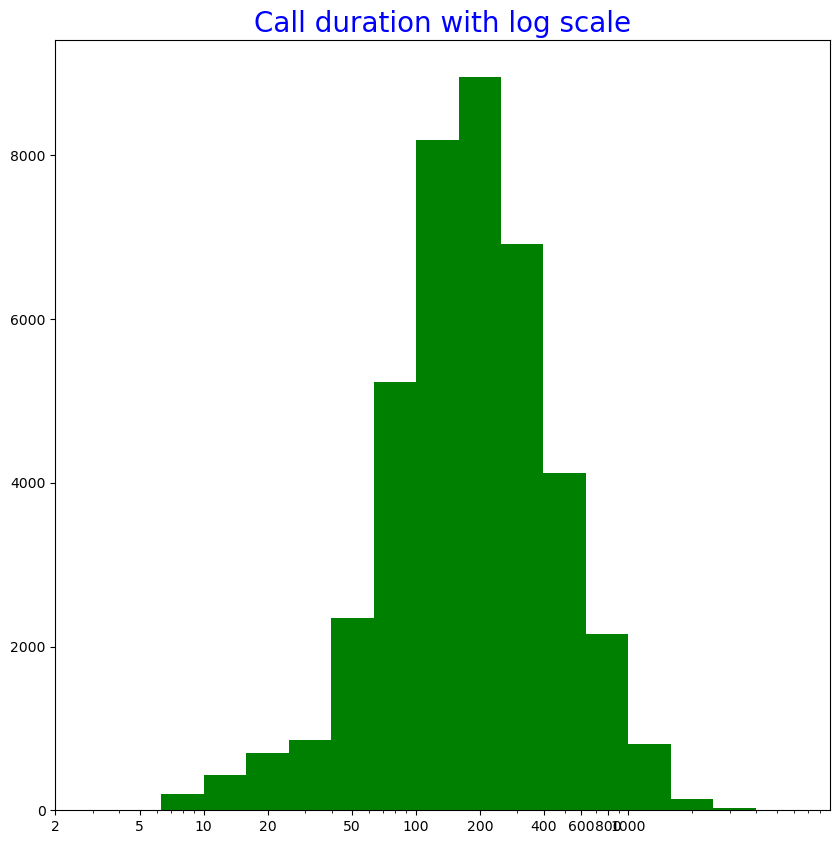

In [18]:
# plot duration with log scale
plt.figure(figsize=(10,10))
binsize = 0.2
x_bins= 10** np.arange(0.8, np.log10(bank_df['duration'].max())+binsize, binsize)
plt.hist(data = bank_df, x = 'duration', bins = x_bins, color = 'green');
plt.xscale('log');
tick_locs = [2, 5, 10, 20, 50, 100, 200, 400, 600, 800, 1000]
plt.xticks(tick_locs, tick_locs);
plt.title("Call duration with log scale",fontsize=20, color='blue')

Majority of the call duration lies in range 50 to 800 secs.

### Examine the EVR(Employment Variation Rate)

Text(0.5, 1.0, 'EVR Distribution')

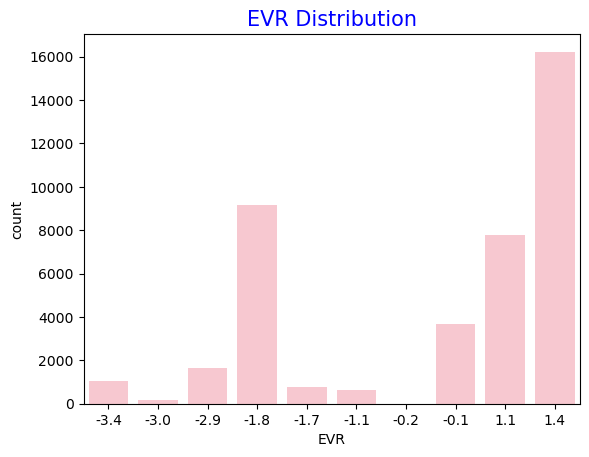

In [19]:
EVR_list = [x for x in bank_df.EVR.unique()]

sns.countplot(data = bank_df, x = 'EVR', order = EVR_list.sort(),color='pink');
plt.title("EVR Distribution", fontsize=15,color='blue')

The distribution for EVR seems to be bimodal i.e. below -0.2 and above -0.2. Majority of the calls were made when the EVR was more than -0.2


### Examine the Consumer Confidence Index (CCI)

Text(0.5, 1.0, 'CCI Distribution')

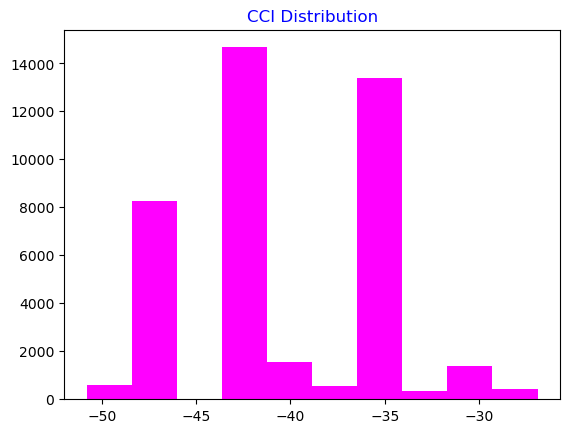

In [20]:
plt.hist(data =bank_df, x = 'CCI', color = 'magenta');
plt.title("CCI Distribution")

Consumer confidence index is always negative. We don't see much of noticeable trend here.

### Examine Consumer Price Index(CPI)

Text(0.5, 1.0, 'CPI Distribution')

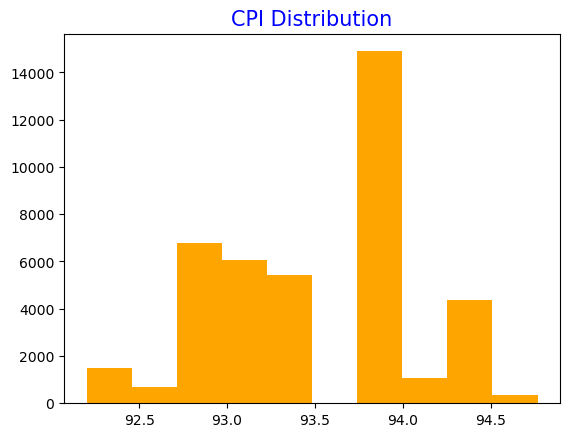

In [21]:
plt.hist(data = bank_df, x = 'CPI', color = 'orange');
plt.title("CPI Distribution",fontsize=15, color='blue')

CPI distribution is also bimodal

### Examine Euribor 3 month rate

Text(0.5, 1.0, 'Euribor Distribution')

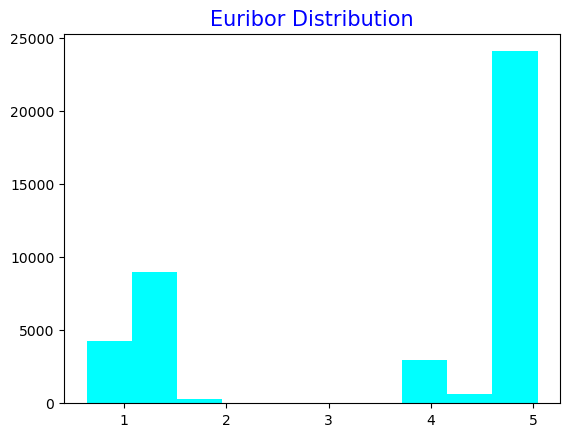

In [22]:
plt.hist(data = bank_df, x = 'euribor', color = 'cyan');
plt.title("Euribor Distribution",fontsize=15,color='blue')

Distribution for Euribor 3 month rate is divided into two parts i.e. one below 2 and one above 3.5. Majority of the calls were made when euribor is above 3.5

## Discuss the distribution of your variables of interest. Were there any unusual points? Did you need to perform any transformations?
#### y -
Out of the total calls that are made, 11.3 % of them are successful and result into client opening a term deposit.
#### age -
Majority of the clients fall in age range of 25 - 60 years old.
#### job - 
Majority of the clients are employed in admin, blue-collar, technician and services job types.
#### education - 
Majority of clients have completed university degree & high school, followed by basic 9y, professional course and basic.4y. For 1730 clients, education status is unknown.
#### marital -
Majority of people fall under single or married
#### duration - 
duration was heavily concentrated until 400s. Log scale has been used for better understanding of the trend. Majority of the call duration lies in range 50 to 800 secs.
#### poutcome - 
Previous campaign outcome is known for 13.6% of the customers. 3.3% of previous outcomes were - successful. It will be interesting to know how likely it is for an existing customer to agree to open a new deposit account.
#### EVR - 
The distribution for Employment Variation Rate seems to be bimodal i.e. below -0.2 and above -0.2. Majority of the calls were made when the EVR was more than -0.2.
#### euribor -
Distribution for Euribor 3 month rate is divided into two parts i.e. one below 2 and one above 3.5. Majority of the calls were made when euribor is above 3.5
## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
* We did not see any unusual distributions. 'duration' variable was heavily concentrated on values below 400s, but that is expected for campaign calls.
* The result column 'y' is categorical variable with values of 'yes' and 'no'. I have added one more column 'y_n' to add a binary representation of the result. Binary values could be useful in our analysis to determine percentage of successful cases.

## Check Correlation between numeric variables

(6.5, -0.5)

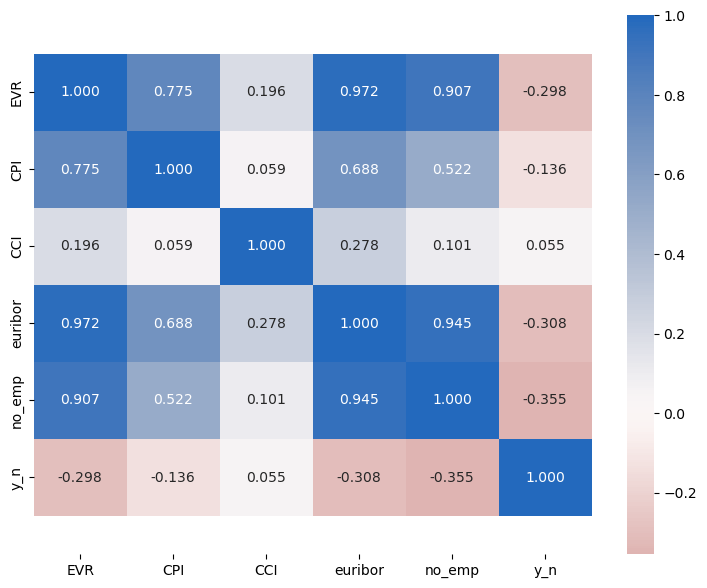

In [23]:
num_vars= ['EVR','CPI','CCI','euribor','no_emp','y_n']
# correlation plot
plt.figure(figsize = [9, 7])

ax = sns.heatmap(bank_df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - .5)

### Our variable of interest i.e. 'y_n' appears to have some correlation with EVR, euribor and no_emp. We will explore this further. There also seems to be very strong correlation in EVR, euribor and no_emp with each other.

### Relation between EVR, euribor, no_emp

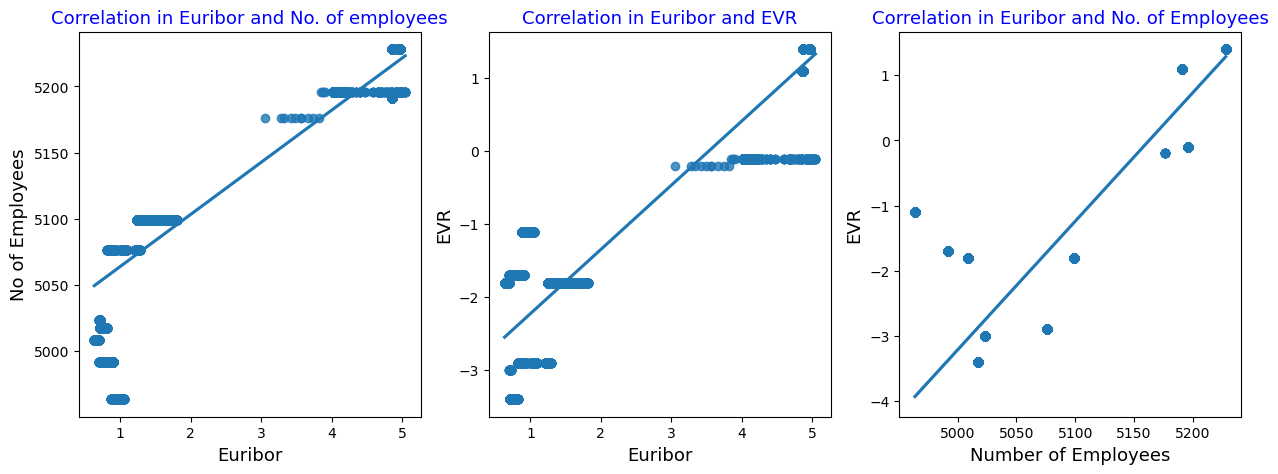

In [24]:
plt.figure(figsize = [15, 5])
font = {'fontsize':'13', 'family': 'sans'}

# left plot: euribor vs no_emp
plt.subplot(1, 3, 1)
sns.regplot(data = bank_df, x = 'euribor', y = 'no_emp')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('No of Employees', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and No. of employees', fontdict = font);

# middle plot: euribor vs EVR
plt.subplot(1, 3, 2)
sns.regplot(data = bank_df, x = 'euribor', y = 'EVR')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and EVR', fontdict = font);

# right plot: no_emp vs EVR
plt.subplot(1, 3, 3)
sns.regplot(data = bank_df, x = 'no_emp', y = 'EVR')
plt.xlabel('Number of Employees', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and No. of Employees', fontdict = font);

##### It seems conclusive that there is a strong correlation in EVR, euribor and no_emp with each other. Also, when euribor is less than 2, EVR is always less than -1. Similarly, when euribor is more than 3, EVR is always more than 0.5.

In [25]:
# Define function to display a plot to show the proportion of clients who say 'yes' for a given category.

def proportion_plot(x):
    parm_counts = bank_df.groupby([x, 'y']).size()
    parm_totals = bank_df.groupby(x).size()
    proportions = parm_counts[:, 'yes']/parm_totals

# Draw bar graph
    plt.style.use('default')
    ind = np.arange(proportions.count())  # the x locations for the groups

# plot bars
    bars_0 = plt.bar(ind, proportions.sort_values(ascending = False), alpha=.7, color = 'orange')

# title and labels
    plt.title('Campaign Success Proportion by {}'.format(x))
    labels = [l for l in proportions.sort_values(ascending = False).index]  # xtick labels
    plt.xticks(ind, labels, rotation = 30)

    plt.xlabel(x, fontdict = {'fontsize':'13'})
    plt.ylabel('Proportion', fontdict = {'fontsize':'13'})
    plt.show()

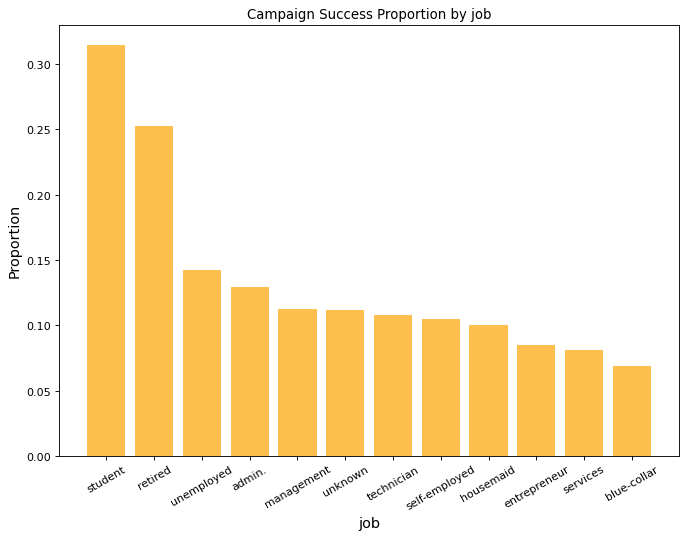

In [26]:
# Proportion by 'job' who say yes

plt.figure(figsize=(10,7), dpi=80)
proportion_plot('job')

Approximately 32% of students and 25% of retirees say 'yes' to open deposit account with the bank

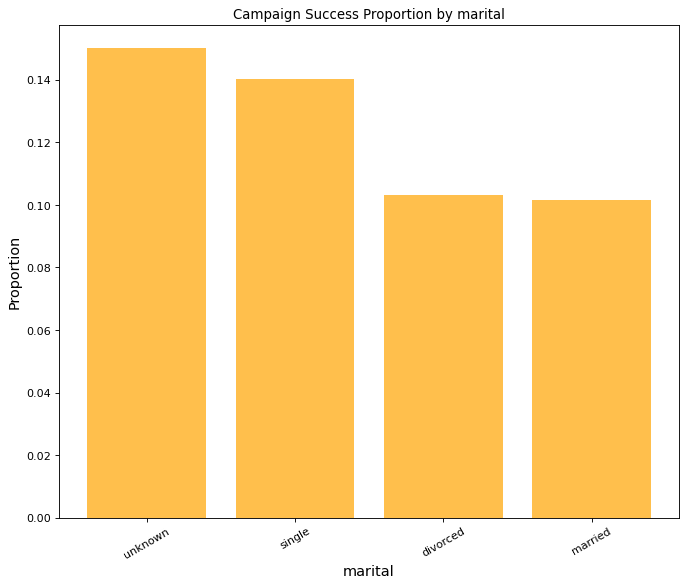

In [27]:
# Proportion by 'marital' status who say yes

plt.figure(figsize=(10,8), dpi=80)
proportion_plot('marital')

Singles open more accounts when compared to divorced or married clients.

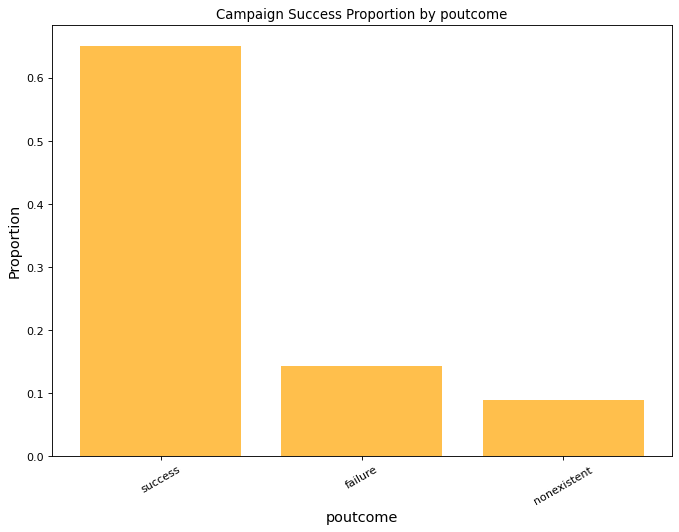

In [28]:
# Proportion by 'poutcome' who say yes

plt.figure(figsize=(10,7), dpi=80)
proportion_plot('poutcome')

65% of the people who agreed for previous campaign agreed for this campaign as well. That is a very significant number and certainly could be used by sales team to select target customers.

### Proportion by age

C:\Users\Preeti\AppData\Local\Temp\ipykernel_13472\725523782.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = bank_df, x = 'age_group', y = 'y_n', ci = None, errorbar=None,color = 'pink');


Text(0.5, 1.0, 'Success proportion per Age Group')

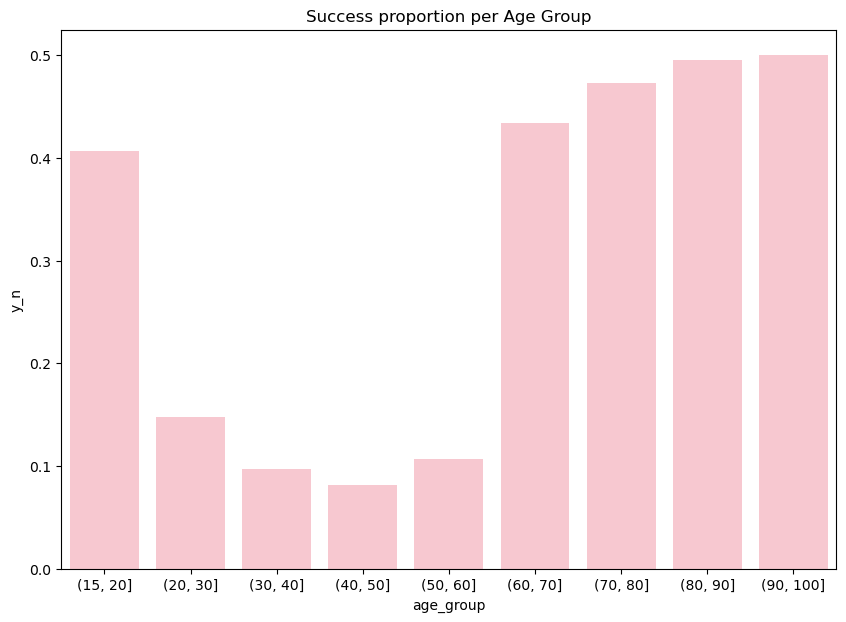

In [29]:
# Let's create age bins

age_bins = [15, 20, 30, 40, 50, 60, 70, 80, 90, 100]

bank_df['age_group'] = pd.cut(bank_df['age'], bins = age_bins)
plt.figure(figsize = (10,7))
sns.barplot(data = bank_df, x = 'age_group', y = 'y_n', ci = None, errorbar=None,color = 'pink');
plt.title('Success proportion per Age Group')


#### This is an interesting trend. Although 97.5% of clients fall in age range of 20-60, they are the ones who are least likely to open the account. Success rate for the calls is more for clients upto 20 and above 60 years of age

### Proportion by campaign calls

C:\Users\Preeti\AppData\Local\Temp\ipykernel_13472\3097663342.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = bank_df, x = 'campaign', y = 'y_n', color = 'red', ci = None);


(-0.5, 20.0)

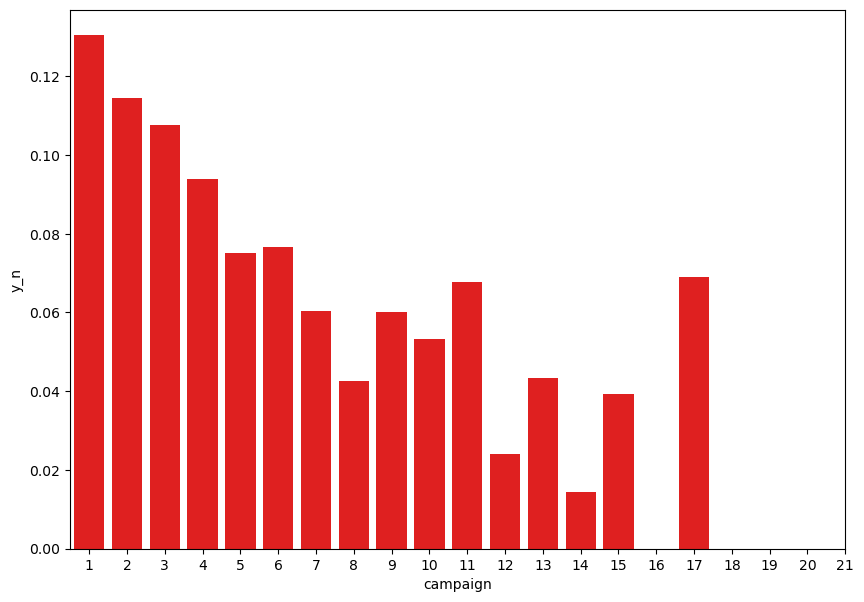

In [30]:
# narrow down chart untill 20 calls
plt.figure(figsize = (10,7))
sns.barplot(data = bank_df, x = 'campaign', y = 'y_n', color = 'red', ci = None);
plt.xlim(-0.5, 20)

##### Most number of customers say yes to opening the account in very first call. As the number of calls increase, the probability decreases for the customer agreeing to opening the account.

## Some of the relationships observed in exploration. How did the features of interest vary with other features in the dataset?
* Our variable of interest i.e. 'y_n' appears to have some correlation with EVR, euribor and no_emp.
* Approximately 32% of students and 25% of retirees say 'yes' to open deposit account with the bank.
* Singles open more accounts when compared to divorced or married clients.
* 65% of the people who agreed with the previous campaign agreed with this campaign as well. That is a very significant number and certainly could be used by the sales team to select target customers.
* Although most clients fall in the age range of 25-60, they are the ones who are least likely to open an account. * Success rate for the calls is more for clients above 60 years of age.
* Most customers say yes to open the account on the very first call. As the number of calls increases, the probability decreases for the customer agreeing to open the account. In fact, the probability is almost zero after 26 calls. The probability after 11 calls is less than 3%.

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
There appears to be a very strong positive correlaton in between EVR, euribor and no_emp. With increase in euribor rates, employment variation rate and number of employees increase as well.

## Coorelation between Euribor, EVR

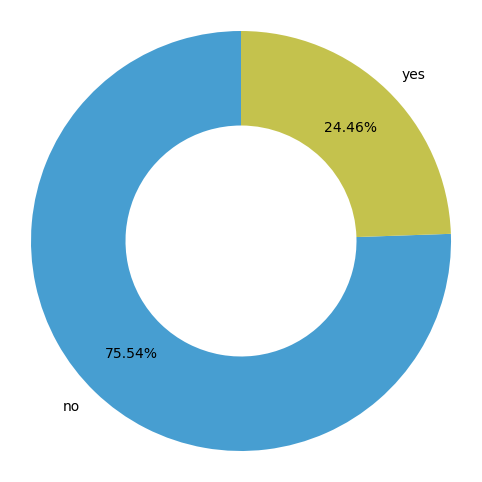

In [31]:
 #selecting records from the whole dataset based on the criteria

df_sub = bank_df.query('euribor < 2')

ratio = df_sub.y.value_counts()

plt.figure(figsize = (10,6))
plt.pie(ratio, labels = ratio.index, autopct='%1.2f%%', pctdistance=0.75, colors = ['#479ed1', '#c4c24d'],
        startangle = 90, wedgeprops = {'width' : 0.45}, textprops={'fontsize': 10})
plt.axis('square');

##### When EVR < -1 and euribor < 2, 24.46% of people agree to opening term deposit. That's a very large ratio and can certainly help to approach customers.

In [32]:
# number of records where euribor is less than 2

bank_df.query('euribor < 2').shape[0]

13494

In [33]:
# number of records where euribor is equal to or more than 2

bank_df.query('euribor >= 2').shape[0]

27682

Number of calls placed when euribor is less than 2 are half of those place when euribor is 2 or more. This is a very significant difference in numbers and highlights an area where we can work upon to get more positive results.

#### Age distribution when euribor < 2

Text(0.5, 1.0, 'Success Proportion of age when Euribor < 2')

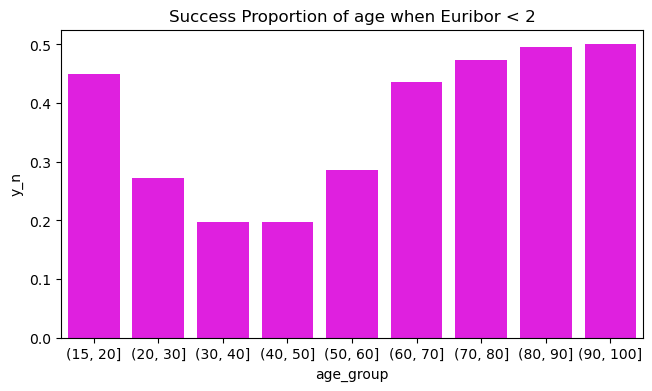

In [34]:
plt.figure(figsize = (7.5,4))

sns.barplot(data = df_sub, x = 'age_group', y = 'y_n',errorbar=None, color = 'magenta');
plt.title('Success Proportion of age when Euribor < 2')

##### When we compare this trend with overall data trend, there are some considerable changes. We see that clients upto 60 years of age, open considerably higher percentage of term deposits when euribor 3 month rate is less than 2. However, clients with more than 60 years of age, follow almost the same trend as in overall data

#### Statistical pattern for age upto 60 years

In [35]:
# average success rate when age is upto 60 years in overall data.

bank_df.query('age <= 60')['y_n'].mean()



0.10492462810738322

In [36]:
# average success rate when age is upto 60 years in subset data(euribor < 2).

df_sub.query('age <= 60')['y_n'].mean()




0.2293023994914985

In [37]:
# average success rate when age is upto 60 years in overall data.

bank_df.query('age > 60')['y_n'].mean()

0.45544554455445546

#### 22.93% of young people(upto age 60) open term deposit when euribor < 2. This is more than the average of 10.49% over the whole dataset.

### Success ratio with education and job

C:\Users\Preeti\AppData\Local\Temp\ipykernel_13472\245537056.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edu = df_sub.groupby(['job', 'education']).mean()['y_n']


(12.5, -0.5)

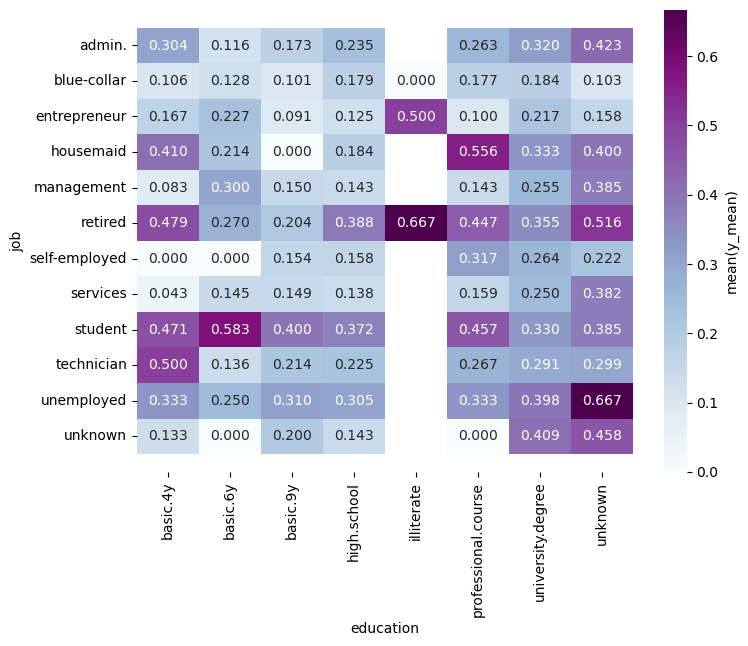

In [38]:
edu = df_sub.groupby(['job', 'education']).mean()['y_n']
edu = edu.reset_index(name = 'y_mean')
edu = edu.pivot(index = 'job', columns = 'education',
                            values = 'y_mean')

plt.figure(figsize = (8,6))
ax = sns.heatmap(edu, annot = True, fmt = '.3f', cmap = 'BuPu',
           cbar_kws = {'label' : 'mean(y_mean)'})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Generally looking at the heatmap, we see that students, technician, retired and unemployed clients are more likely to open term deposit. Also clients who have studied at university, prodessional course and basic 4y. Clients with unknown educational background are most likely to open term deposit.

### some of the relationships observed in exploration. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
* We noticed that when euribor 3 month rate is less than 2, success rate of the campaign increases to 24.46%. This is significant increase from 11.3% success rate in overall data.
* Number of calls placed when euribor is less than 2 are half of those place when euribor is 2 or more. This is a very significant difference in numbers and highlights an area where we can work upon to get more positive results.
* Statistically, 22.93% of young people(upto age 60) open term deposits when euribor < 2. This is more than the average of 10.49% over the whole dataset for the same age group. Therefore, we can conclude that clients upto 60 years of age open considerably higher percentage of accounts when euribor 3 month rate is less than 2. However, clients with more than 60 years of age, follow almost the same trend as in overall data.

### Were there any interesting or surprising interactions between features?
Surprisingly, clients with unknown educational background are most likely to open term deposit.


### Recommendations
* We observed that when euribor 3 month rate is less than 2, clients under the age of 60 are twice more likely to open a term deposit. 
* We should noticed that bank called only half the number of customers when euribor was less than 2 as compared to otherwise. So, we should target to call more customers during this period for better success rate.
* In overall data, students and retirees are much more likely to open term deposit. 45% of clients above 60 years of age agreed to open term deposit. But we have only 2.5% of customers in this range. 
* It is recommended to include more of students, retirees and clients older than 60 years of age to get a better success rate in overall dataset.
* Clients for whom previous campaign outcome was successful, agreed to 65% of the calls. This is significant figure and can be used to target customers in further campaigns.

In [1]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [2]:
bank_df = pd.read_csv(r"C:\Users\Preeti\Desktop\Data Glacier Internship\Bank_Campaign_Marketing\Dataset\bank-additional-full.csv",sep=";")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank_df.shape

(41188, 21)

In [5]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
def nullVal(bank_df):
    missing_num = bank_df.isnull().sum()
    missing_percent = (100 * missing_num / len(bank_df))
    concatinated_value = pd.concat([missing_num, missing_percent], axis = 1)

    missing = concatinated_value.rename(columns = {0:"Missing ", 1:"Percent of Missing Values"})
    in_sorted_order = missing[missing.iloc[:,1]!=0].sort_values(by= 'Percent of Missing Values', ascending = False).round(1)
    print("Full Bank Data has a total of '{}' coloumns from which the '{}' coloumns are having missing values.".format(bank_df.shape[1],in_sorted_order.shape[0]))
    return in_sorted_order
missing_num = nullVal(bank_df)

Full Bank Data has a total of '21' coloumns from which the '0' coloumns are having missing values.


<AxesSubplot: >

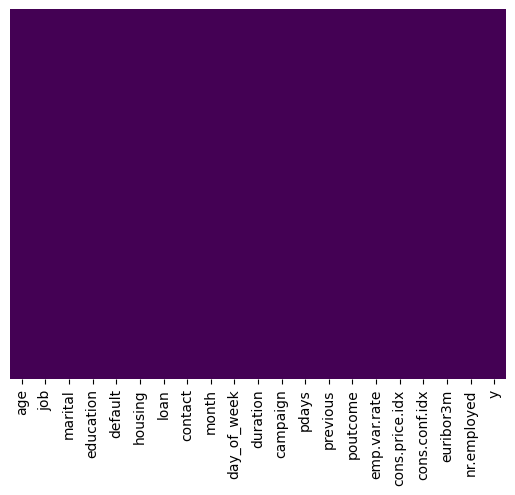

In [7]:
sns.heatmap(bank_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
c = 0;

for col in bank_df:
    if bank_df[col].dtype == 'object':
        if len(list(bank_df[col].unique())) <= 2:
            l = preprocessing.LabelEncoder()
            bank_df[col] = l.fit_transform(bank_df[col])
            c = c + 1;
            print(col)

contact
y


In [9]:
bank_df.shape

(41188, 21)

In [10]:
bank_df= pd.get_dummies(bank_df)
bank_df.shape

(41188, 63)

In [11]:
X= bank_df.iloc[:,:--1]
y= bank_df.iloc[:,-1]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Writing the method for the Classification result, and the matrix

In [13]:
def print_score(classification, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_train,classification.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, classification.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, classification.predict(X_train))))

        res = cross_val_score(classification, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train==False:
        print("Test Result:\n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_test,classification.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, classification.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test,classification.predict(X_test))))

In [14]:
standarScaler= StandardScaler()
X_train = standarScaler.fit_transform(X_train)
X_test = standarScaler.transform(X_test)

In [15]:
smote = SMOTE(random_state=15, sampling_strategy= 1.0)
x_train_right , y_train_right = smote.fit_resample(X_train,y_train)

### Logistic Regression

In [16]:
logistic_reg = LogisticRegression( C = 0.0001, random_state=21)
logistic_reg.fit(x_train_right,y_train_right)

LogisticRegression(C=0.0001, random_state=21)

In [17]:
print_score(logistic_reg, x_train_right, y_train_right, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.5118

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.61      0.56     31860
           1       0.51      0.41      0.46     31860

    accuracy                           0.51     63720
   macro avg       0.51      0.51      0.51     63720
weighted avg       0.51      0.51      0.51     63720


Confusion Matrix: 
 [[19408 12452]
 [18657 13203]]

Average Accuracy: 	 0.5118
Accuracy SD: 		 0.0048


In [18]:
#Now let's set train = False, to see the result
print_score(logistic_reg, x_train_right, y_train_right, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.5994

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.61      0.75      7955
           1       0.03      0.39      0.06       283

    accuracy                           0.60      8238
   macro avg       0.50      0.50      0.40      8238
weighted avg       0.93      0.60      0.72      8238


Confusion Matrix: 
 [[4827 3128]
 [ 172  111]]



### Random Forest Classifier

In [19]:
# Now we use RandomForestClassifier method to see the recall and precission difference

classification_report_random_forest = RandomForestClassifier(n_estimators=40,random_state=21)
classification_report_random_forest.fit(x_train_right,y_train_right)

RandomForestClassifier(n_estimators=40, random_state=21)

In [20]:
print_score(classification_report_random_forest,x_train_right,y_train_right, X_test,y_test, train= False)

Test Result:

Accuracy score: 0.7325

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84      7955
           1       0.06      0.42      0.10       283

    accuracy                           0.73      8238
   macro avg       0.51      0.58      0.47      8238
weighted avg       0.94      0.73      0.82      8238


Confusion Matrix: 
 [[5914 2041]
 [ 163  120]]



### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtcprediction = dtc.predict(X_test)

In [22]:
print_score(dtc,x_train_right,y_train_right, X_test,y_test, train= False)

Test Result:

Accuracy score: 0.9656

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7955
           1       0.50      0.00      0.01       283

    accuracy                           0.97      8238
   macro avg       0.73      0.50      0.49      8238
weighted avg       0.95      0.97      0.95      8238


Confusion Matrix: 
 [[7954    1]
 [ 282    1]]



### The best model is Decision tree classifier mode